In [ ]:
import ultralytics
from ultralytics import YOLO
import torch
from IPython.display import display, Image
from roboflow import Roboflow
import torchvision
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt
ultralytics.checks()

Ultralytics YOLOv8.0.110 🚀 Python-3.11.3 torch-2.0.1 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)
Setup complete ✅ (8 CPUs, 29.4 GB RAM, 311.0/344.3 GB disk)


In [ ]:
first_run = False
if first_run:
    print("True")

In [ ]:
first_run = False
if first_run:
    !{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'
    !wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [2]:
rf = Roboflow(api_key="YW205AxZmuLvHxIwf99j")
project = rf.workspace("vkr-v2").project("vkrrr")
dataset = project.version(5).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.110, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to VKRRR-5 in yolov8:: 100%|██████████| 6844/6844 [00:03<00:00, 2213.90it/s]


In [3]:
model = YOLO('yolov8n.pt')

In [4]:
results = model.predict(source='./zidane.jpg', conf=0.25)


image 1/1 /home/arty/SAM/zidane.jpg: 384x640 2 persons, 1 tie, 54.5ms
Speed: 4.4ms preprocess, 54.5ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


In [5]:
results

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair',

In [6]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs

bbox=boxes.xyxy.tolist()[1]

In [7]:
bbox

[746.568603515625, 40.80133056640625, 1142.08056640625, 712.3660888671875]

In [8]:
image = cv2.imread('./zidane.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [9]:
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)
predictor.set_image(image)

In [10]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

In [11]:
input_box = np.array([746.568603515625, 40.80133056640625, 1142.08056640625, 712.3660888671875])

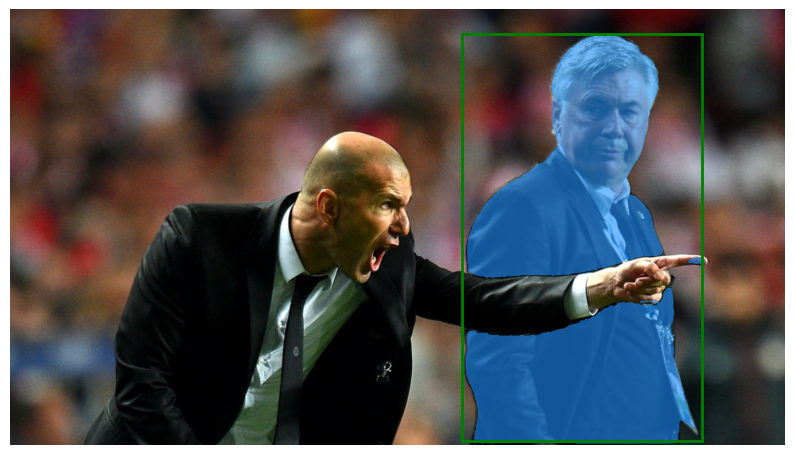

In [12]:
masks, _, _ = predictor.predict(
    point_coords=None,
    point_labels=None,
    box=input_box[None, :],
    multimask_output=False,
)

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks[0], plt.gca())
show_box(input_box, plt.gca())
plt.axis('off')
plt.show()

In [13]:
from ultralytics import SAM

model = SAM('sam_b.pt')
model.info()  # display model information
model.predict('./zidane.jpg')  # predict


100%|██████████| 358M/358M [00:02<00:00, 129MB/s] 
Model summary: 238 layers, 93735472 parameters, 93735472 gradients
Ultralytics YOLOv8.0.110 🚀 Python-3.11.3 torch-2.0.1 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

image 1/1 /home/arty/SAM/zidane.jpg: 1280x3 1572.4ms
Speed: 0.0ms preprocess, 1572.4ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 keys: ['masks']
 masks: ultralytics.yolo.engine.results.Masks object
 names: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29}
 orig_img: array([[[38, 48, 72],
         [40, 50, 74],
         [40, 51, 73],
         ...,
         [25, 21, 56],
         [21, 19, 55],
         [17, 15, 51]],
 
        [[37, 47, 71],
         [37, 47, 71],
         [37, 48, 70],
         ...,
         [24, 20, 55],
         [18, 16, 52],
         [13, 11, 47]],
 
        [[41, 51, 75],
         [39, 49, 73],
         [37, 48, 70],
         ...,
         [24, 20, 56],
         [20, 16, 52],
         [16, 12, 48]],
 
        ...,
 
        [[48, 43, 40],
         [49, 44, 41],
         [48, 43, 40],
         ...,
         [49, 49, 35],
        

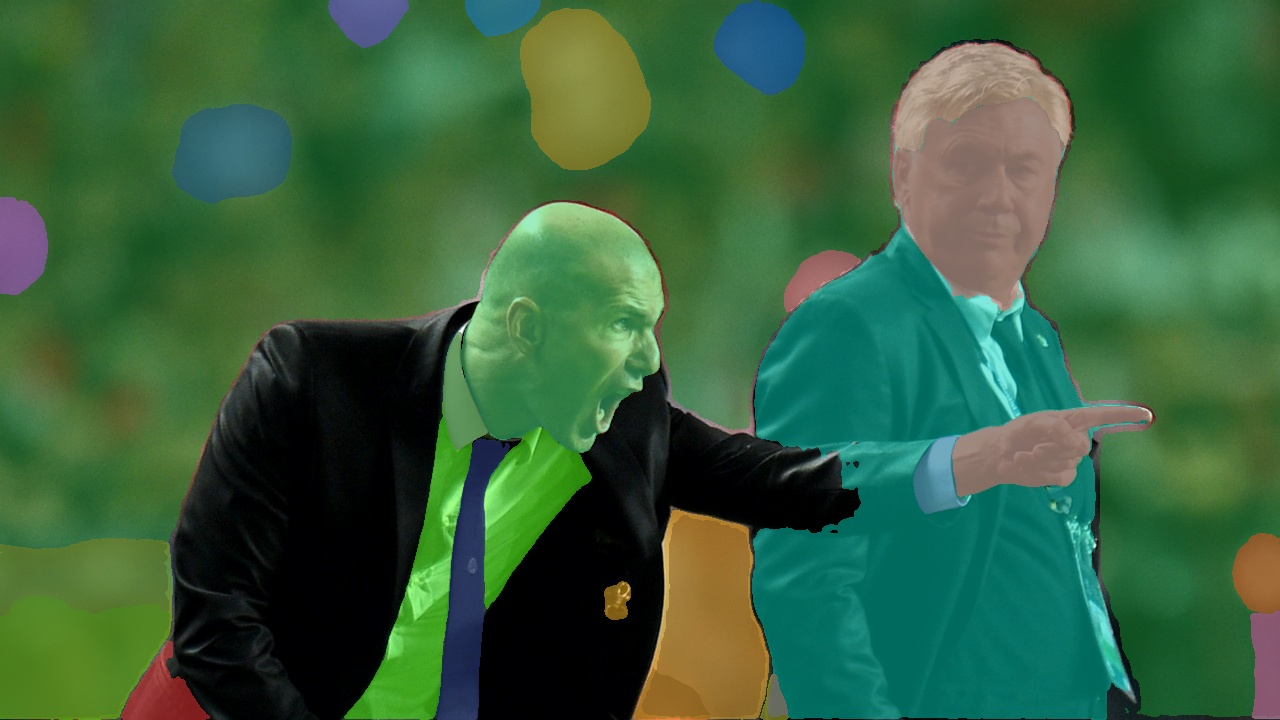

In [14]:
Image(filename='runs/segment/predict/zidane.jpg', height=600)

In [19]:
dataset.location

'/home/arty/SAM/VKRRR-5'

In [23]:
from ultralytics.yolo.data.annotator import auto_annotate

auto_annotate(data="./VKRRR-5/train/images/", det_model="yolov8x.pt", sam_model='sam_b.pt')


Ultralytics YOLOv8.0.110 🚀 Python-3.11.3 torch-2.0.1 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

image 1/2679 /home/arty/SAM/VKRRR-5/train/images/-0378D390-5AE2-4D09-84BB-387E850F5E5A-png_jpg.rf.710eda0b3ed3df92bfd712b0b3337613.jpg: 640x640 1 person, 1 truck, 21.9ms
image 2/2679 /home/arty/SAM/VKRRR-5/train/images/-046E9840-F025-4749-B3AB-19402B34E739-png_jpg.rf.e237eb4d1fa61f0c91117f137b901221.jpg: 640x640 2 cars, 19.6ms
image 3/2679 /home/arty/SAM/VKRRR-5/train/images/-0471C451-8CA5-4CEA-8EFD-3B0F147BF4B7-png_jpg.rf.dd097a767468bdca48e28faabdf527c5.jpg: 640x640 1 car, 18.9ms
image 4/2679 /home/arty/SAM/VKRRR-5/train/images/-0573F94C-289D-4503-A571-94C6C8C5674C-png_jpg.rf.86a38630d997dc048dc915969e118905.jpg: 640x640 1 car, 1 bus, 1 train, 18.9ms
image 5/2679 /home/arty/SAM/VKRRR-5/train/images/-0585CFA0-7CD6-45D3-B7EB-1A109425F90D-png_jpg.rf.a6da30c0dfdc29366389f46b6e84bf2c.jpg: 640x640 1 car, 19.0ms
image 6/2679 /home/arty/SAM/VKRRR-5/train/images/-0ACAD937-70A4-46F0-8E49-0CAE6F942CF2-

In [8]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics YOLOv8.0.110 🚀 Python-3.11.3 torch-2.0.1 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /home/arty/SAM/zidane.jpg: 384x640 2 persons, 1 tie, 52.5ms
Speed: 4.1ms preprocess, 52.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


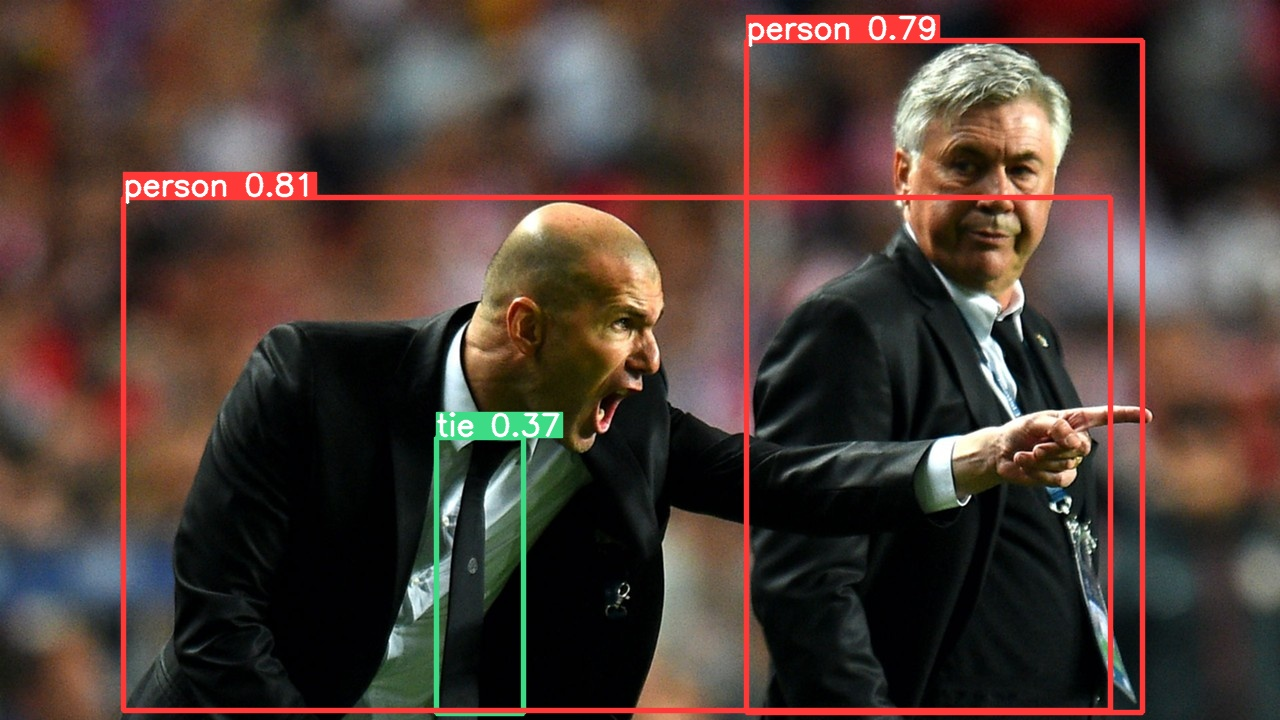

In [9]:
Image(filename='runs/detect/predict2/zidane.jpg', height=600)

In [15]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [18]:
image = cv2.imread('./zidane.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [20]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [21]:
masks = mask_generator.generate(image)

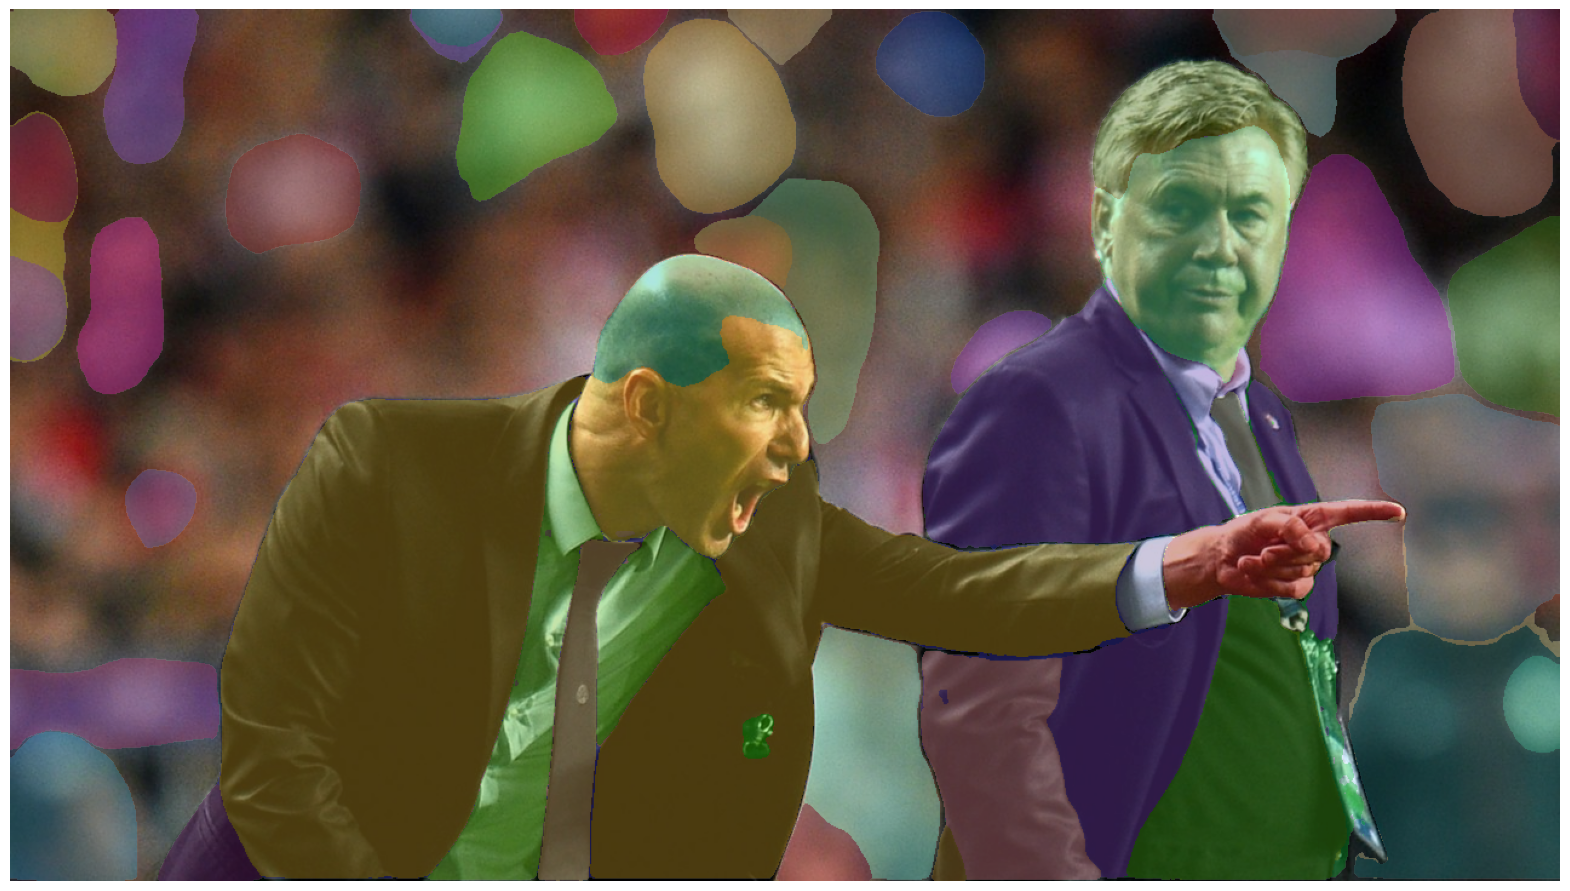

In [22]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [23]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)

In [24]:
masks2 = mask_generator_2.generate(image)

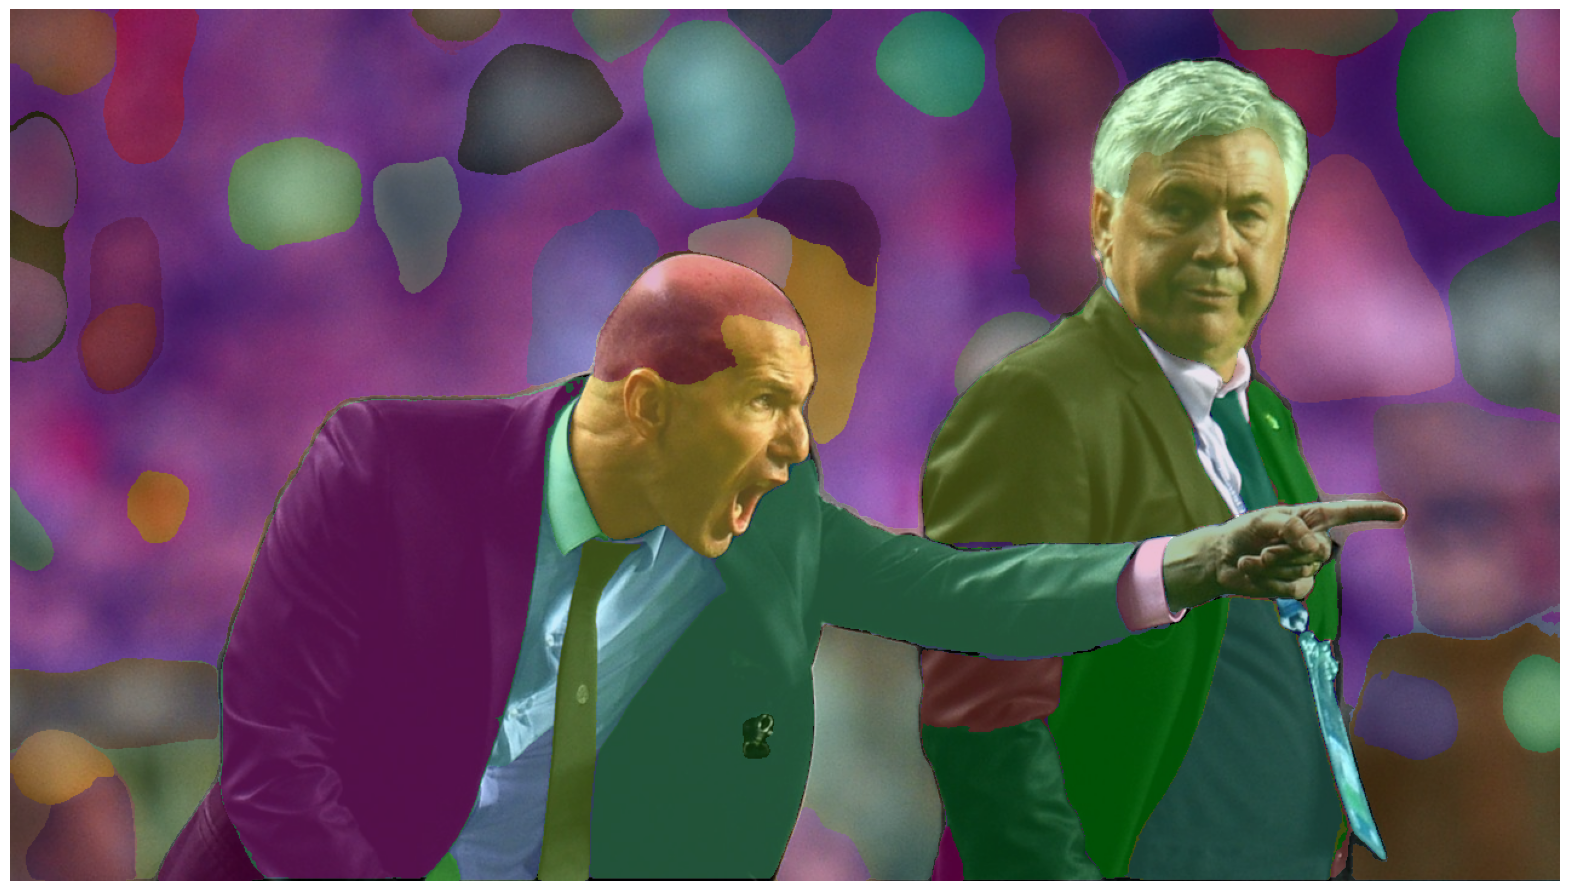

In [25]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show() 

In [26]:
dataset